<a href="https://colab.research.google.com/github/ErSangram/New_York_city_taxi_Trip-Time-Prediction/blob/main/NYC_taxi_Trip_Time_Prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - NYC Taxi Trip Time Prediction

##### **Project Type**    - Regression
##### **Contribution**    - Individual

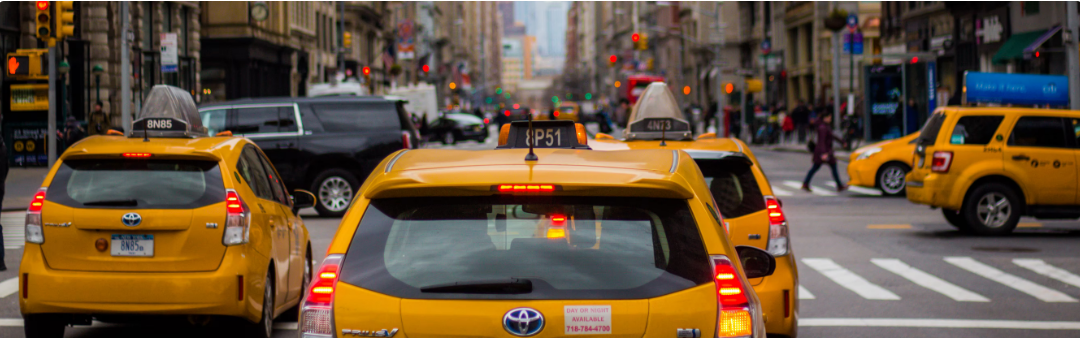

# **Project Summary -**

The NYC taxi trip time prediction project involves building a machine learning model to predict the time it takes for a taxi to travel from one location to another in New York City. The model takes into account various factors such as traffic conditions, weather, time of day, and origin-destination pairs to make its predictions.         

To build the model, a large dataset of historical taxi trip records is used to train the model. This dataset includes information such as pickup and drop-off locations, time of day, and trip duration. Various machine learning algorithms, such as regression and decision trees, can be applied to the data to build a predictive model.

Once the model is trained, it can be used to predict the trip time for new, unseen taxi trips in NYC. This information can be useful for taxi drivers and passengers, as well as for transportation planning and optimization.

The results of the project can also be used to understand the factors that influence taxi trip times in NYC, such as traffic patterns, weather conditions, and time of day. This information can be used to make improvements to the city's transportation infrastructure and to develop more efficient transportation systems.

# **GitHub Link -** https://github.com/ErSangram/New_York_city_taxi_Trip-Time-Prediction


# **Problem Statement**

The problem statement for the NYC taxi trip time prediction project is to accurately predict the time it takes for a taxi to travel from one location to another in New York City. The objective is to develop a machine learning model that takes into account various factors such as time of day, and origin-destination pairs to make its predictions.

The challenge lies in capturing the complex relationships between the various factors that influence taxi trip times and accurately predicting the trip duration for any given trip.

The solution to this problem will have practical applications for taxi drivers and passengers, as well as for transportation planning and optimization. Accurate taxi trip time predictions can help drivers plan their routes more effectively and reduce the time and cost of travel for passengers. It can also be used to improve the city's transportation infrastructure and to develop more efficient transportation systems.

# ***Let's Begin !***

## **1. Know About Data**

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/Alma_projects/NYC Taxi Data.csv')

### Dataset First View

In [ ]:
# Dataset First Look
data.sample(4)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
77679,id0077713,2,2016-01-24 23:42:40,2016-01-24 23:47:43,4,-74.003899,40.725468,-74.003899,40.725468,N,303
878966,id1248885,2,2016-02-11 10:32:33,2016-02-11 10:56:38,3,-73.978485,40.755867,-73.949623,40.726189,N,1445
1201583,id0511441,1,2016-03-29 12:11:19,2016-03-29 12:51:48,3,-74.001167,40.757271,-73.995399,40.683674,N,2429
344717,id1983174,1,2016-03-31 22:04:42,2016-03-31 22:09:06,1,-74.006050,40.735340,-73.998459,40.745403,N,264


In [ ]:
data.tail(2)   

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(1458644, 11)

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(data[data.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

### Dataset Observations.

*   Dataset released by New York City taxi and Limousine Commision.
*   The dataset has 1458644 rows and 11 columns. The columns contains various data types this are object, int and float.       
*   In the dataset not present duplicate records.      
*   There are also not present null values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
columns= list(data.columns)
columns

['id',
 'vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'trip_duration']

In [ ]:
# Dataset Describe
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


### Variables Description 

*  **id :** a unique identifier for each trip

*   **vendor_id :** a code indicating the provider associated with the trip red

*   **pickup_datetime :** date and time when the meter was engaged

*   **dropoff datetime :** date and time when the meter was disengaged

*  **passenger_count:**the number of passengers in the vehicle (driver entered value)

*   **pickup_longitude:** the longitude where the meter was engaged

*   **pickup_latitude:** the latitude where the meter was engaged

*   **dropoff_longitude:**the longitude where the meter was disengaged

*   **dropoff latitude:** the latitude where the meter was disengaged

*   **store_and_fwd_flag:** This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server- Y=store and forward; N=not a store and forward trip

*   **trip_duration:**duration of the trip in seconds


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
a,b = [],[]
for i in list(data.columns):
    a.append(i)
    b.append(data[i].nunique()) 
    
lis = list(zip(a,b))
df = pd.DataFrame(lis, columns = ['column_names','unique values'])
df

,column_names,unique values
0,id,1458644
1,vendor_id,2
2,pickup_datetime,1380222
3,dropoff_datetime,1380377
4,passenger_count,10
5,pickup_longitude,23047
6,pickup_latitude,45245
7,dropoff_longitude,33821
8,dropoff_latitude,62519
9,store_and_fwd_flag,2


## 3. ***Data Wrangling***

In [ ]:
#Delect id column from dataset, that will not usefull for our work.
data.drop(['id'],axis=1, inplace= True)

In [ ]:
# In this data only few null values are present, that is deleting.
data.dropna().inplace = True

In [ ]:
# Importing datetime modules
from datetime import datetime
from datetime import date

In [ ]:
#need to canvert pickup_datetime and dropoff_datetime calumn in date format
data['pickup_datetime']= pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [ ]:
# Adding a new column as month 
data['month'] = data['pickup_datetime'].dt.month_name()
data['month'].unique()

array(['March', 'June', 'January', 'April', 'May', 'February'],
      dtype=object)

## ***4. Data Vizualization, Experimenting with charts : Understand the relationships between variables***

###**Share of vendors in total trips- Pie Chart (Univariate)**

Text(0.5, 1.0, 'vendor_id share in %')

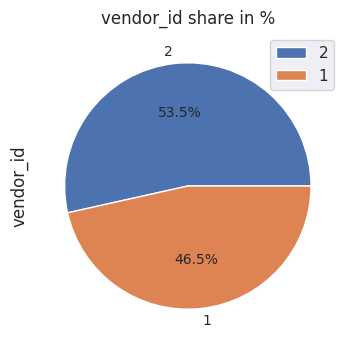

In [ ]:
# Plot pie chart for vendor_id
data['vendor_id'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(10,4),fontsize=10)
plt.legend()
plt.title('vendor_id share in %')

####The insights found from the chart

*   Here we got to know that there are only 2 venders(1 and 2)
*   Both the venders share almost equal amount of trips, the difference is quite low between two venders
*   But Vendor 2 is evidently more famous among the population as per the above graphs.

In [ ]:
# average trip durations by unique vendors
data.groupby('vendor_id').trip_duration.mean()

vendor_id
1     845.438244
2    1058.643164
Name: trip_duration, dtype: float64

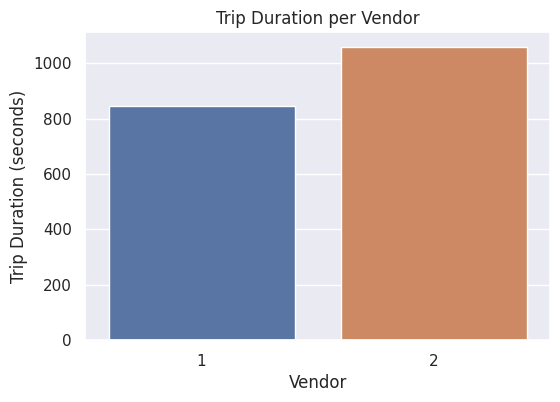

In [ ]:
#ploting bor chart on average trip durations by vendors
group1 = data.groupby('vendor_id').trip_duration.mean()
plt.figure(figsize =(6,4))
sns.barplot(x =group1.index, y = group1.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Vendor')
plt.title('Trip Duration per Vendor')
plt.show()

####The insights found from the chart
Vendor 2 takes the crown. Average trip duration for vendor 2 is higher than vendor 1 by a quite low margin.

###**Trips For Vendor_id With Number of Passenger**

In [ ]:
data['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

Text(0.5, 1.0, 'Count of Trips For Vendor_id With Number of Passenger')

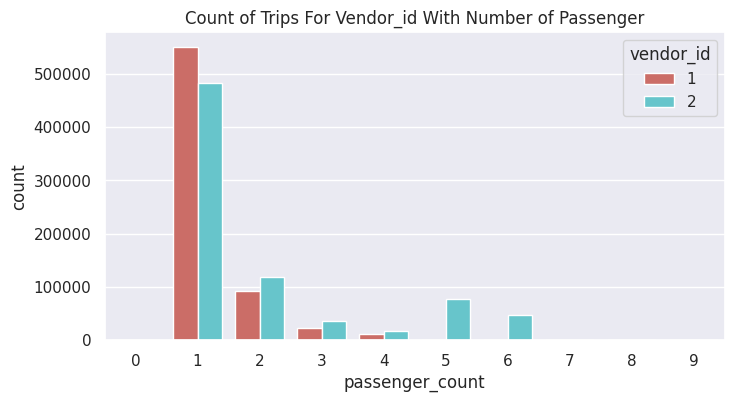

In [ ]:
# Chart - 2 
sns.set(color_codes=True)
plt.figure(figsize=(8,4))
sns.countplot(x= 'passenger_count',hue='vendor_id', data=data, palette = 'hls')
plt.title('Count of Trips For Vendor_id With Number of Passenger')

####The insights found from the chart?
*  Most of trip consist of passenger either 1 or 2.
*  There are some trips with 0 passenger count.
*  Few trips consisted of even 6, 7, 8 or 9 passengers. Clear outliers and pointers to data inconsistency
*   Most of trip consist of passenger either 1 or 2.

###**Count of Total trips in various month**

Text(0.5, 1.0, 'Monthly Count of Total trips')

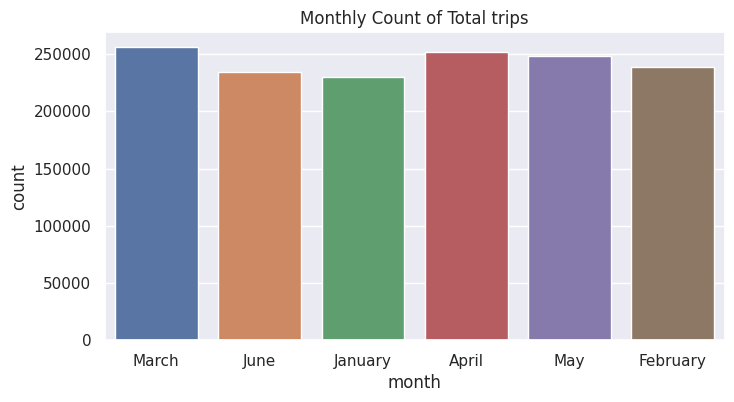

In [ ]:
#Count of Total trips in various month
plt.figure(figsize=(8,4))
sns.countplot(x='month', data=data)
plt.title('Monthly Count of Total trips')

####The insight found from the chart.

From the graph of the months, it can be seen that all months have values close to the amount of data, with the lowest value in January and the highest in March.

##**Data Distribution of Trip duration data column**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

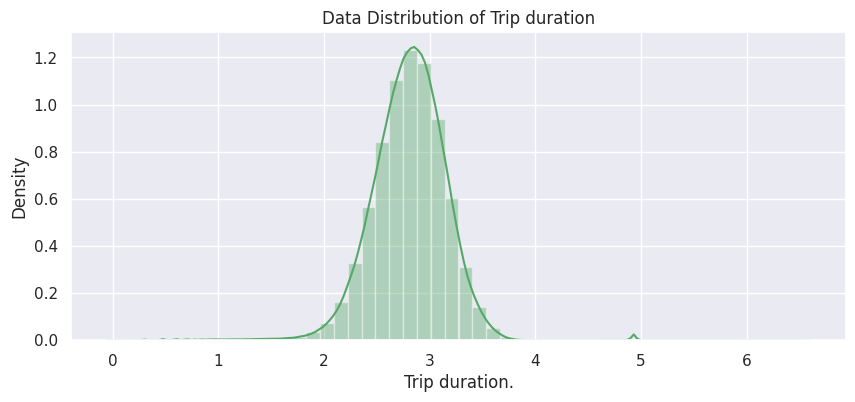

In [ ]:
#Distribution plot for trip duration
plt.figure(figsize = (10,4))
sns.distplot(np.log10(data['trip_duration']),color="g")
plt.title('Data Distribution of Trip duration')
plt.xlabel('Trip duration.')
plt.show()

###**Check outlires by ploting Box Plot**

Text(0.5, 1.0, 'Box plot for location columns')

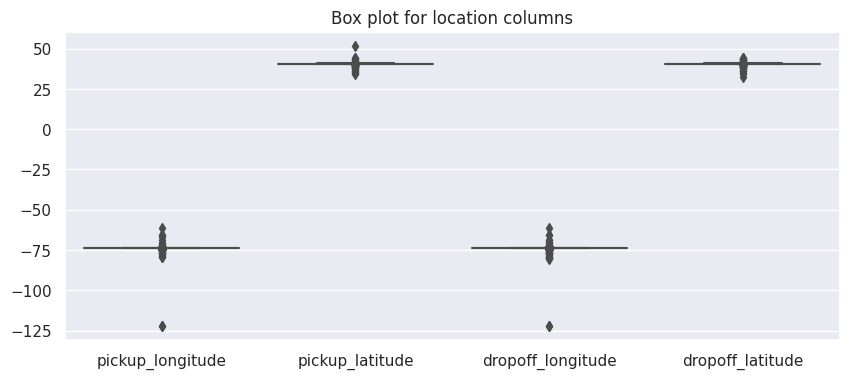

In [ ]:
# Check outlires for columns latitude and longitude columns
plt.figure(figsize = (10,4))
sns.boxplot(data = data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude','dropoff_latitude']])
plt.title('Box plot for location columns')

<Axes: >

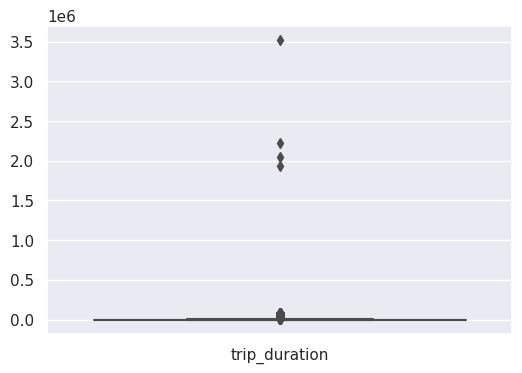

In [ ]:
# Check outlires for trip_duration column
plt.figure(figsize = (6,4))
sns.boxplot(data = data[['trip_duration']])

## **5. Hypothesis Testing**

### Hypothetical Statement - 1

**There is a significant difference in the trip duration between trips with a single passenger and trips with multiple passengers.**

####1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*   **Null hypothesis:** There is no significant difference in the trip duration between trips with a single passenger and trips with multiple passengers.

*  **Alternative hypothesis:** There is a significant difference in the trip duration between trips with a single passenger and trips with multiple passengers.

####2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Divide the dataset into two groups - one with trips with a single passenger and another with trips with multiple passengers
single_passenger_trips = data[data['passenger_count'] == 1]['trip_duration']
multi_passenger_trips = data[data['passenger_count'] > 1]['trip_duration']

# Perform a two-sample t-test
t_stat, p_val = stats.ttest_ind(single_passenger_trips, multi_passenger_trips, equal_var=False)

print('p-value:', p_val)


p-value: 9.892681782325478e-28


The p-value of **9.89e-28** signifies that the probability of observing such extreme differences in trip duration between single passenger trips and multi-passenger trips by chance is very low. Therefore, **we can reject the null hypothesis** and conclude that **there is a significant difference in trip duration between these two groups**.

####Which statistical test have you done to obtain P-Value?
*  a two-sample t-test



####Why did you choose the specific statistical test?
 
We can randomly divide the dataset into two groups - one with trips with a single passenger and another with trips with multiple passengers. We can then compare the mean trip duration of these two groups using a two-sample t-test. If the p-value obtained is less than the significance level, we can reject the null hypothesis and conclude that there is a significant difference in the trip duration between trips with a single passenger and trips with multiple passengers.

###Hypothetical Statement - 2

**Trips during weekdays have a longer duration compared to weekends.**



####1. State Your research hypothesis as a null hypothesis and alternate hypothesis.   
*  **Null Hypothesis:** The day of the week does not significantly affect the duration of the trip.

*  **Alternative Hypothesis:** The day of the week significantly affects the duration of the trip, with longer trip durations on weekdays compared to weekends.

####2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# create a new column for day of the week (0=Monday, 1=Tuesday, ..., 6=Sunday)
data['day_of_week'] = pd.to_datetime(data['pickup_datetime']).dt.dayofweek

# separate the dataset into two groups: weekdays and weekends
weekdays = data.loc[data['day_of_week'] < 5, 'trip_duration']
weekends = data.loc[data['day_of_week'] >= 5, 'trip_duration']

# perform two-sample t-test to determine whether the means of the two groups are significantly different
t_stat, p_val = ttest_ind(weekdays, weekends, equal_var=False)

print('t-statistic:', t_stat)
print('p-value:', p_val)


t-statistic: 3.900843948746583
p-value: 9.586970042130944e-05


The **t-statistic of 3.9008** indicates that the difference between the means of the two groups (weekday and weekend trip durations) **is 3.9008 times greater than the standard error of the difference between the means.**

The **p-value of 9.586970042130944e-05** (0.00009587) is less than the commonly used significance level of 0.05, which suggests **strong evidence against the null hypothesis**.

Therefore, we reject Null hypothesis and conclude that there is a statistically significant difference between the means of weekday and weekend trip durations

####Which statistical test have you done to obtain P-Value?  
*  t-test for two independent samples

####Why did you choose the specific statistical test? 
We can separate the dataset into two groups: one group containing trip durations for weekdays and the other group containing trip durations for weekends. We can then calculate the mean and standard deviation of each group and perform a two-sample t-test to determine whether the difference in means is statistically significant.

## **6. Feature Engineering & Data Pre-processing**

###1.Calculate Distance Between Pickup point to Dropoff point

In [ ]:
#importing geopy library
from geopy.distance import great_circle

#Creating the function for calculating distance between pickup and dropoff
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
    start_coordinates=(pickup_lat,pickup_long)
    stop_coordinates=(dropoff_lat,dropoff_long)
 
    return great_circle(start_coordinates,stop_coordinates).km

In [ ]:
# Apply cal_distance function on pickup and dropoff data columns
data['distance'] = data.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)


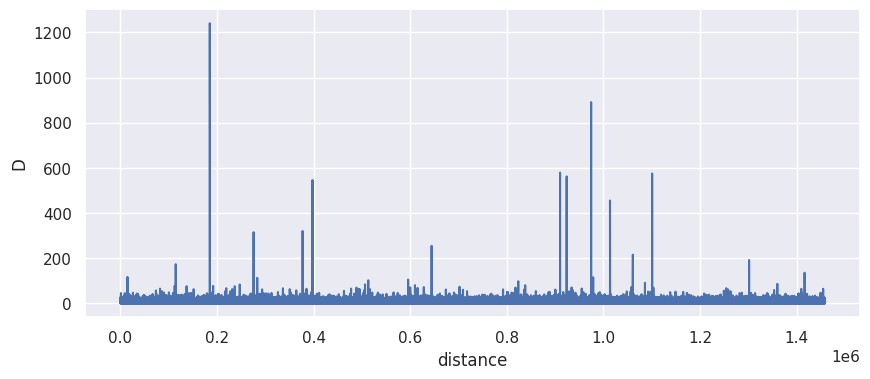

In [ ]:
#Distribution plot for New added distance column
plt.figure(figsize = (10,4))
plt.plot(data.distance)
plt.xlabel('distance')
plt.ylabel('D')
plt.show()

<Axes: >

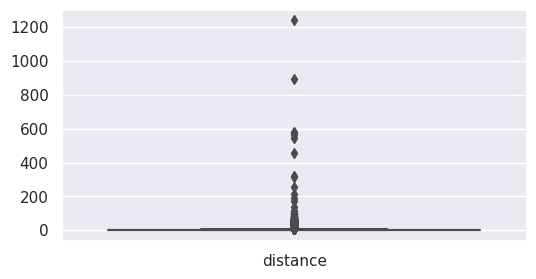

In [ ]:
## Check outlires for distance column
plt.figure(figsize = (6,3))
sns.boxplot(data = data[['distance']])

###1. Handling Missing Values

There is no missing value to handle in our dataset

### 2. Handling Outliers

In [ ]:
print(data.trip_duration.max())
print(data.trip_duration.min())
print(data.trip_duration.mean())
print(data.trip_duration.std())

3526282
1
959.4922729603659
5237.431724497621


In [ ]:
# Handling Outliers & Outlier treatment on trip_duration using The interquartile range (IQR)
Q1 = data.trip_duration.quantile(0.25)
Q3 = data.trip_duration.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-0.5*IQR
upper_limit = Q3 +1.5*IQR

In [ ]:
#selecting data between limits
data= data[(data.trip_duration > lower_limit) & (data.trip_duration < upper_limit)]

Ideally, IQR method is best suited for datasets which are skewed (either left or right). The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

Quantile based flooring and capping - In this technique, the data points that are less than the 25th percentile are replaced with its 25th percentile value and the data points at are greater than the 75th percentile are replaced by 75th percentile value.

In [ ]:
# select non outlier data from the pickup location column
data = data[(data['pickup_longitude'] > -75) & (data['pickup_longitude'] < -73)]
data = data[(data['pickup_latitude']>40) & (data['pickup_latitude'] < 41.5)]

In [ ]:
# select non outlier data from the dropoff location column
data = data[(data['dropoff_longitude'] > -75) & (data['dropoff_longitude'] < -73)]
data = data[(data['dropoff_latitude']>40) & (data['dropoff_latitude'] < 41.5)]

###Scatter Plot (Multivariate)

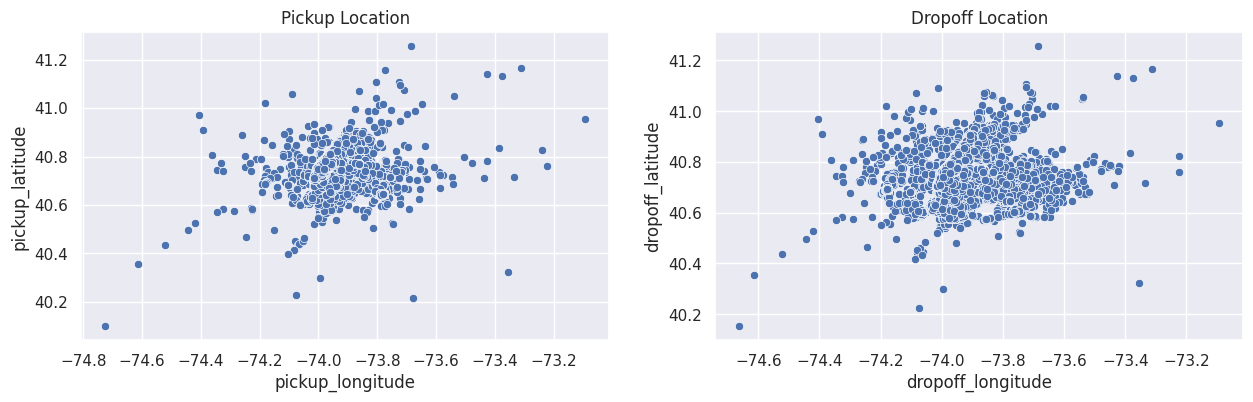

In [ ]:
#lets see pickup and dropoff location after removing outlires
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(15,4))
ax3.set_title('Pickup Location')
ax=sns.scatterplot(x=data.pickup_longitude,y=data.pickup_latitude,ax=ax3)
ax4.set_title('Dropoff Location')
ax=sns.scatterplot(x=data.dropoff_longitude,y=data.dropoff_latitude,ax=ax4)

###Insight found from the chart.
This scatter plots representing us about the different pickup latitude and pickup longitude points as well as dropoff latitude and dropoff longitude in a New York City.

In [ ]:
# Remove Outliers from Passenger count column by selecting most possible passenger count for taxi, that is between 1 to 5
data = data[(data['passenger_count'] <6) & (data['passenger_count'] !=0)]

In [ ]:
# Outlier treatment from distance column by selecting possible distance that means between 0.25 km to 25km.
data = data[(data['distance'] > 0.25) & (data['distance'] <20)]

Text(0.5, 1.0, 'Data Distribution of distance')

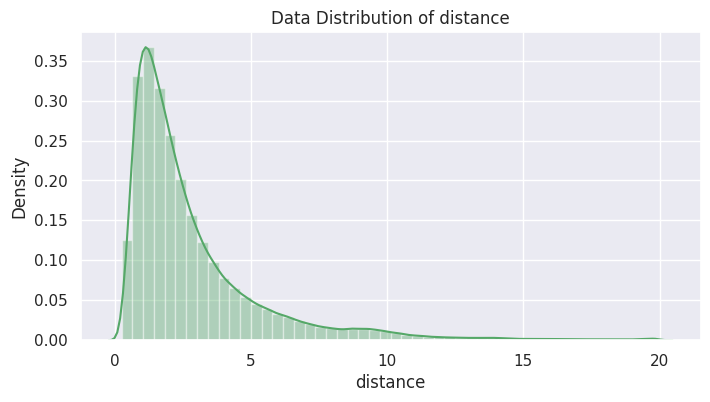

In [ ]:
#Distribution plot for distance
plt.figure(figsize=(8,4))
sns.distplot((data['distance']),color="g")
plt.title('Data Distribution of distance')

### 3.Creating new Features

In [ ]:
# create pickup hour and dropoff hour column by extracting hours from date columns
data["pickup_hour"] = data["pickup_datetime"].apply(lambda x: x.hour)
data["dropoff_hour"] = data["dropoff_datetime"].apply(lambda x: x.hour)

<Axes: title={'center': 'Count of trips hourly from Dropoff Days'}, xlabel='dropoff_hour', ylabel='count'>

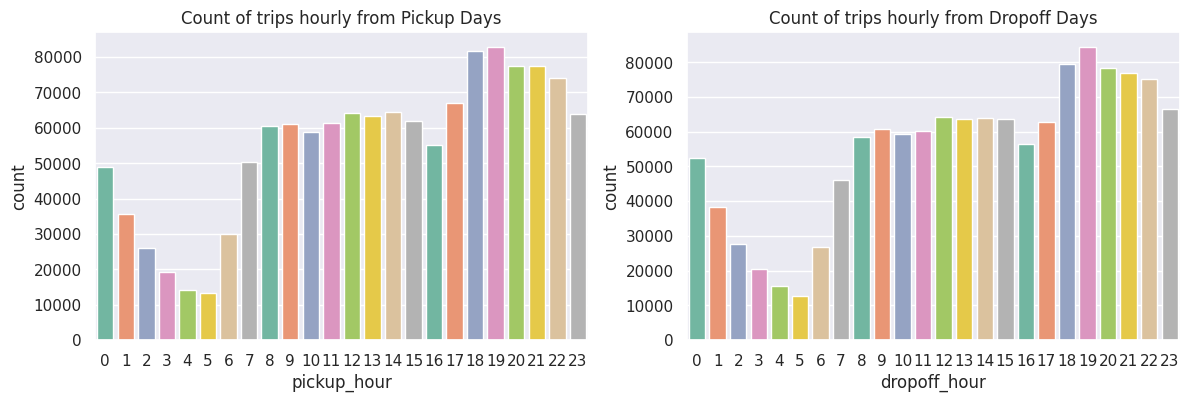

In [ ]:
# ploting the subplots 
fig, axs = plt.subplots(1,2, figsize=(14, 4))

# ploting the pickup days against the pickup hour 
axs[0].set_title('Count of trips hourly from Pickup Days')
axs[1].set_title('Count of trips hourly from Dropoff Days')

sns.countplot(x=data['pickup_hour'],palette = ("Set2"),ax=axs[0])
sns.countplot(x=data['dropoff_hour'],palette = ("Set2"),ax=axs[1]) 

From the pickup hour chart, it can be seen that few trips take place between 0:00 am and 5:00 am and that many trips take place between 6:00 pm and 10:00 pm.

###Point Plots (Bivariate Analysis)


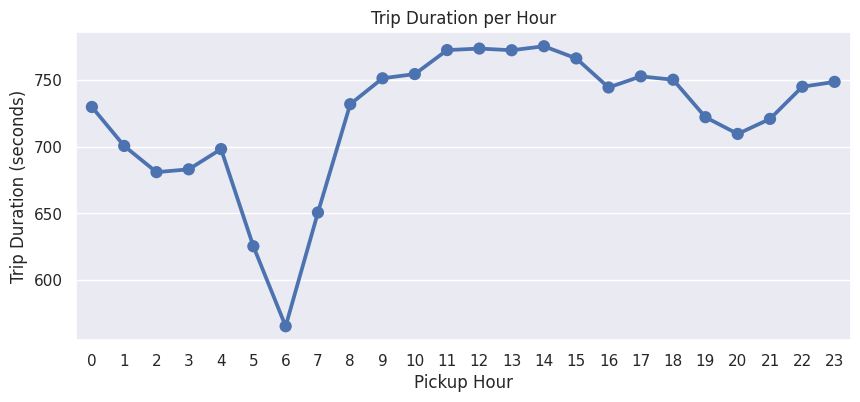

In [ ]:
# is the trip duration higher at diffent hours ?
plt.figure(figsize = (10,4))
group1 = data.groupby('pickup_hour').trip_duration.mean()
ax = sns.pointplot(x = group1.index, y =group1.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Pickup Hour')
plt.title('Trip Duration per Hour')
plt.show()

###The insights found from the chart

Average trip duration is lowest at 6 AM when there is minimal traffic on the roads.   
Average trip duration is generally highest around 3 PM during the busy streets.1  
Trip duration on an average is similar during early morning hours i.e. before 6 AM & late evening hours i.e. after 6 PM

###Creating New Feature as 'part of day'

In [ ]:
# Define function to give time slot according to the time of day

def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,17):
        return 'Afternoon'
    elif x in range(17,23):
        return 'Evening'
    else:
        return 'Latenight'

# Apply time_of_day function on pickup hour coumn and create new column as part of day
data['part_of_day']=data['pickup_hour'].apply(time_of_day)

<Axes: title={'center': 'Count of trips for time-slot of day'}, xlabel='part_of_day', ylabel='count'>

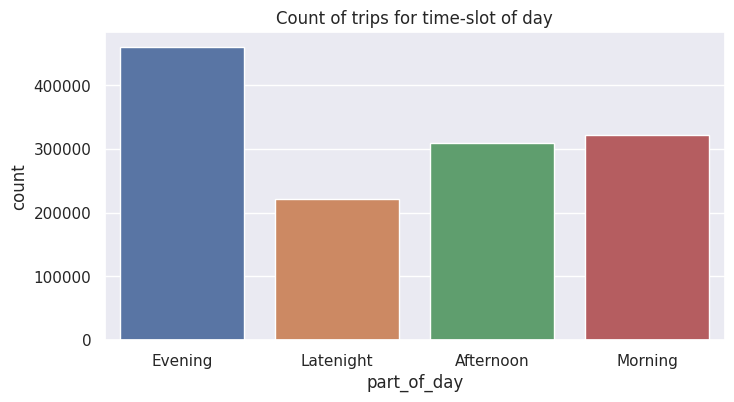

In [ ]:
plt.figure(figsize=(8,4))
plt.title('Count of trips for time-slot of day')
sns.countplot(x=data['part_of_day'])

In [ ]:
#Avarage time for different parts of day
data.groupby('part_of_day')['trip_duration'].mean()

part_of_day
Afternoon    766.887143
Evening      732.829063
Latenight    712.371653
Morning      719.107508
Name: trip_duration, dtype: float64

In [ ]:
data.head(2)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,day_of_week,distance,pickup_hour,dropoff_hour,part_of_day
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,March,0,1.498523,17,17,Evening
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,June,6,1.805510,0,0,Latenight


In [ ]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,day_of_week,distance,pickup_hour,dropoff_hour
count,1.313560e+06,1.313560e+06,1.313560e+06,1.313560e+06,1.313560e+06,1.313560e+06,1.313560e+06,1.313560e+06,1.313560e+06,1.313560e+06,1.313560e+06
mean,1.517724e+00,1.513354e+00,-7.397733e+01,4.075253e+01,-7.397539e+01,4.075308e+01,7.340391e+02,3.058751e+00,2.877636e+00,1.360698e+01,1.358971e+01
std,4.996860e-01,1.057093e+00,2.821977e-02,2.473038e-02,2.896830e-02,2.939725e-02,4.410441e+02,1.958710e+00,2.642384e+00,6.450973e+00,6.525228e+00
min,1.000000e+00,1.000000e+00,-7.472672e+01,4.009979e+01,-7.466313e+01,4.015374e+01,5.900000e+01,0.000000e+00,2.500152e-01,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399208e+01,4.073835e+01,-7.399142e+01,4.073721e+01,3.900000e+02,1.000000e+00,1.225627e+00,9.000000e+00,9.000000e+00
50%,2.000000e+00,1.000000e+00,-7.398207e+01,4.075446e+01,-7.398005e+01,4.075490e+01,6.350000e+02,3.000000e+00,2.014386e+00,1.400000e+01,1.400000e+01
75%,2.000000e+00,2.000000e+00,-7.396873e+01,4.076830e+01,-7.396417e+01,4.077008e+01,9.900000e+02,5.000000e+00,3.494621e+00,1.900000e+01,1.900000e+01
max,2.000000e+00,5.000000e+00,-7.323800e+01,4.115737e+01,-7.322501e+01,4.107109e+01,2.091000e+03,6.000000e+00,1.999992e+01,2.300000e+01,2.300000e+01


In [ ]:
numeric_features = ['passenger_count','pickup_longitude', 'pickup_latitude', 'dropoff_longitude','dropoff_latitude', 'distance']

In [ ]:
numeric_features = data.describe().columns

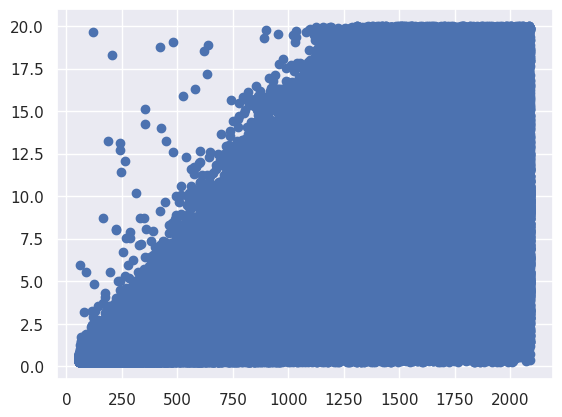

In [ ]:
plt.scatter(x=data['trip_duration'], y=data['distance'])

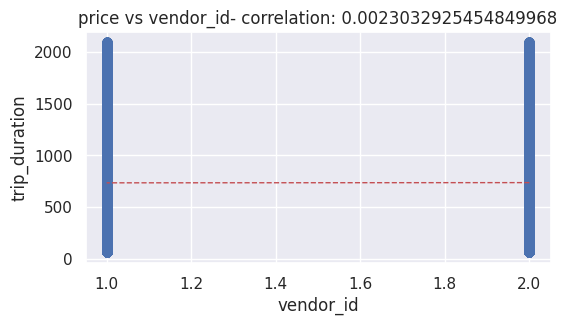

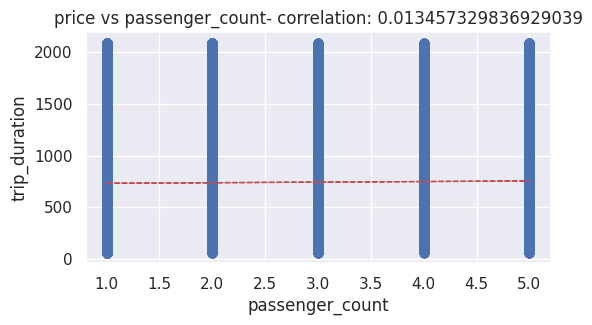

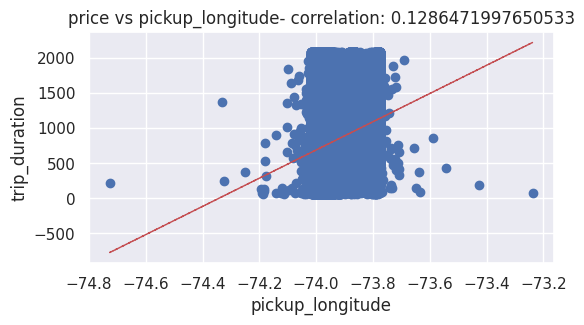

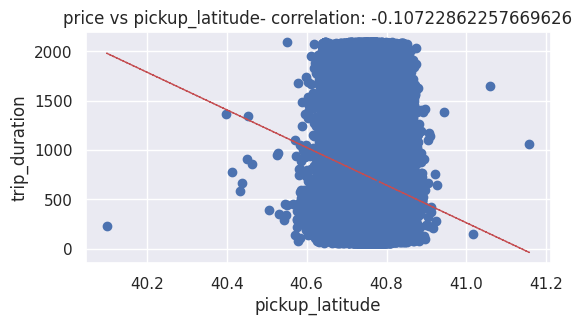

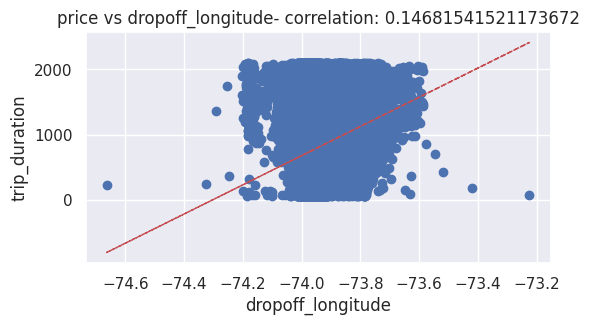

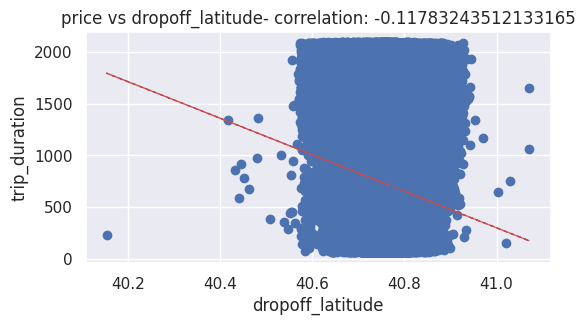

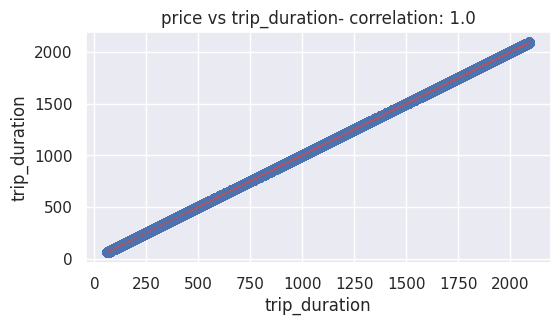

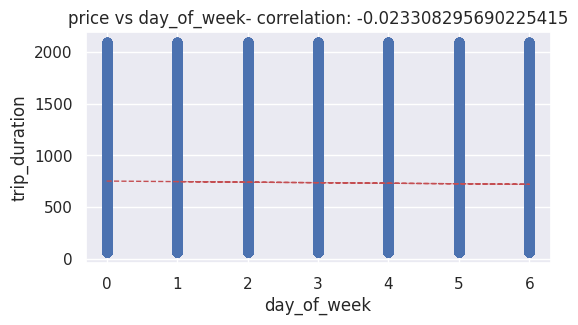

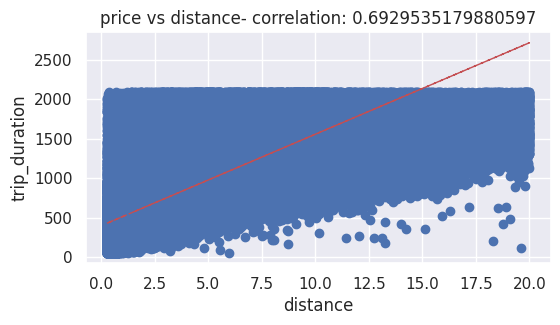

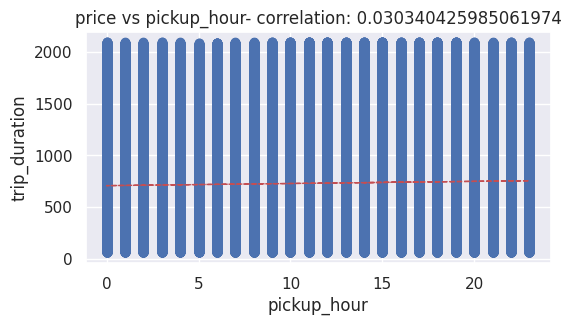

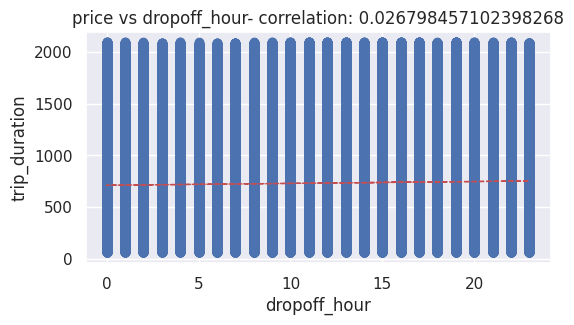

In [ ]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(6, 3))
    ax = fig.gca()
    feature = data[col]
    label = data['trip_duration']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('trip_duration')
    ax.set_title('price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(data[col], data['trip_duration'], 1)
    y_hat = np.poly1d(z)(data[col])

    plt.plot(data[col], y_hat, "r--", lw=1)

plt.show()

In [ ]:
data.shape

(1313560, 16)

<Axes: >

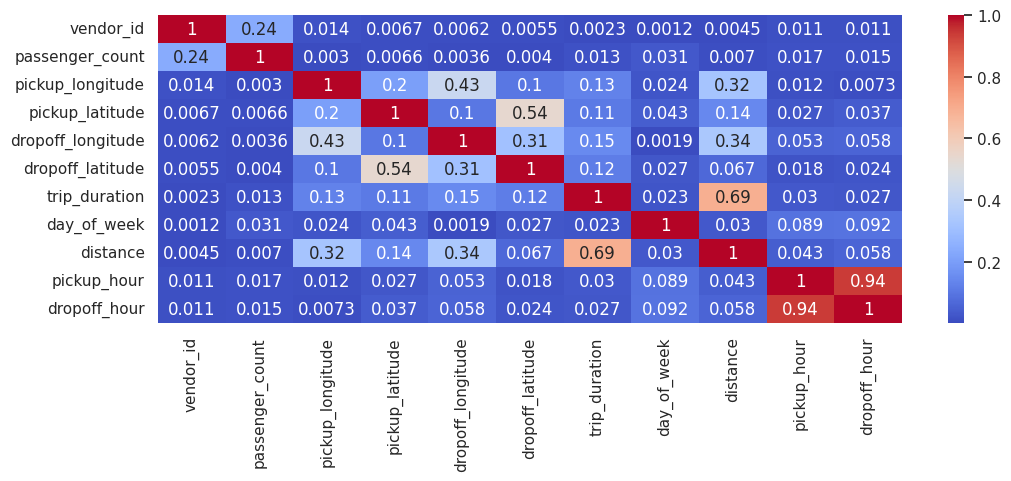

In [ ]:
 ## Correlation
plt.figure(figsize=(12,4))
correlation = data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
#Calculating VIF to check for multicollinearity
calc_vif(data[[i for i in data.describe().columns]])

,variables,VIF
0,vendor_id,1.084213e+01
1,passenger_count,3.237585e+00
2,pickup_longitude,7.079451e+06
3,pickup_latitude,3.688261e+06
4,dropoff_longitude,6.962944e+06
5,dropoff_latitude,2.843932e+06
6,trip_duration,7.518373e+00
7,day_of_week,3.492773e+00
8,distance,4.403618e+00
9,pickup_hour,4.687828e+01


### 4. Categorical Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# One hot encoding
data = pd.get_dummies(data, columns=['part_of_day'], prefix=['p_'])

In [ ]:
data.head(1)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,day_of_week,distance,pickup_hour,dropoff_hour,p__Afternoon,p__Evening,p__Latenight,p__Morning
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.96463,40.765602,N,455,March,0,1.498523,17,17,0,1,0,0


In [ ]:
independent_variables=['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude','distance', 'pickup_hour','p__Afternoon','p__Evening','p__Latenight','p__Morning']

In [ ]:
# Data for all the independent variables
X = data[independent_variables]

Y = data['trip_duration']

In [ ]:
X

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,pickup_hour,p__Afternoon,p__Evening,p__Latenight,p__Morning
0,-73.982155,40.767937,-73.964630,40.765602,1.498523,17,0,1,0,0
1,-73.980415,40.738564,-73.999481,40.731152,1.805510,0,0,0,1,0
3,-74.010040,40.719971,-74.012268,40.706718,1.485501,19,0,1,0,0
4,-73.973053,40.793209,-73.972923,40.782520,1.188590,13,1,0,0,0
6,-73.969017,40.757839,-73.957405,40.765896,1.326280,22,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1458639,-73.982201,40.745522,-73.994911,40.740170,1.225082,13,1,0,0,0
1458640,-74.000946,40.747379,-73.970184,40.796547,6.049844,7,0,0,0,1
1458641,-73.959129,40.768799,-74.004433,40.707371,7.824617,6,0,0,0,1
1458642,-73.982079,40.749062,-73.974632,40.757107,1.092565,15,1,0,0,0


### 5. Data Scaling

In [ ]:
# Scaling data using standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X =scaler.fit_transform(X)

### 6. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=1)

In [ ]:
X_train.shape, X_test.shape

((985170, 10), (328390, 10))

In [ ]:
X_train

array([[-0.7612956 , -1.11783674, -1.04891418, ...,  1.36029992,
        -0.44989308, -0.57019326],
       [-0.52905942, -1.11475171, -0.18558549, ..., -0.735132  ,
         2.22275035, -0.57019326],
       [ 0.41502527,  0.39243973,  0.8826455 , ...,  1.36029992,
        -0.44989308, -0.57019326],
       ...,
       [-0.38658157, -1.16688872, -0.17979134, ..., -0.735132  ,
         2.22275035, -0.57019326],
       [-0.20571312,  0.2809159 ,  0.10043494, ...,  1.36029992,
        -0.44989308, -0.57019326],
       [-0.04403996, -0.45872006, -0.61435276, ..., -0.735132  ,
         2.22275035, -0.57019326]])

# **7. ML Model Implementation**

### ML Model - 1) Linear Regression

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
linear_reg =  LinearRegression()

#Aplly model on train dataset
linear_reg.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#model score on train dataset
linear_reg.score(X_train, Y_train)  

0.5240911130100057

In [ ]:
# import evalution metrics form sklearn library.
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
#predicted value of train dataset
y_pred_train = linear_reg.predict(X_train)

#Train Data Evaluation Metrics 
lr_train_mse  = mean_squared_error((Y_train), (y_pred_train))
print("Train MSE :" , lr_train_mse)

lr_train_rmse = np.sqrt(mean_squared_error(Y_train, y_pred_train))
print('Train RMSE:', lr_train_rmse)

lr_train_r2 = r2_score((Y_train), (y_pred_train))
print("Train R2 :" ,lr_train_r2) 

lr_train_r2_ = 1-(1-r2_score((Y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ",lr_train_r2_)

Train MSE : 92647.57743050507
Train RMSE: 304.38064562403616
Train R2 : 0.5240911130100057
Train Adjusted R2 :  0.5240862822274925


In [ ]:
#predicted value of test dataset
y_pred_test = linear_reg.predict(X_test)

# Test Data Evaluation Metrics 
lr_test_mse  = mean_squared_error((Y_test), (y_pred_test))
print("Test MSE :" , lr_test_mse)

lr_test_rmse = np.sqrt(mean_squared_error(Y_test, y_pred_test))
print('Train RMSE:', lr_train_rmse)

lr_test_r2 = r2_score((Y_test), (y_pred_test))
print("Test R2 :" ,lr_test_r2)

lr_test_r2_ = 1-(1-r2_score((Y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ",lr_test_r2_)

Test MSE : 92717.7756170166
Train RMSE: 304.38064562403616
Test R2 : 0.5222030862779247
Test Adjusted R2 :  0.5221885361113878


### ML Model - 2) Ridge Regression

In [ ]:
# Create Ridge regression model and fit to training data
from sklearn.linear_model import Ridge
alpha = 1.0   # Regularization strength

model = Ridge(alpha=alpha)
model.fit(X_train, Y_train)

In [ ]:
#model score on train dataset
model.score(X_train, Y_train)

Cross-Validation Hyperparameters Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Cross validation
model = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(model, parameters, scoring='r2', cv=5)
ridge_regressor.fit(X_train, Y_train)

In [ ]:
# Print best hyperparameter and corresponding mean cross-validation score
print('Best alpha:', ridge_regressor.best_params_['alpha'])
print('Best CV score:', ridge_regressor.best_score_)

In [ ]:
#predicted value of train dataset using ridge_regressor.
y_pred_ridge_train =ridge_regressor.predict(X_train)

ridge_train_mse  = mean_squared_error(Y_train, y_pred_ridge_train)
print("Train MSE :" , ridge_train_mse)

ridge_train_r2 = r2_score(Y_train, y_pred_ridge_train)
print("Train R2 :" ,ridge_train_r2)

ridge_train_r2_= 1-(1-r2_score(Y_train, y_pred_ridge_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ", ridge_train_r2)

In [ ]:
#predicted value of test dataset using ridge_regressor.
y_pred_ridge_test = ridge_regressor.predict(X_test)
ridge_test_mse  = mean_squared_error(Y_test, y_pred_ridge_test)
print("Test MSE :" , ridge_test_mse)

ridge_test_r2 = r2_score(Y_test, y_pred_ridge_test)
print("Test R2 :" ,ridge_test_r2)

ridge_test_r2_= 1-(1-r2_score(Y_test, y_pred_ridge_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", ridge_test_r2_)

####Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.
  
our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

### ML Model - 3) Random Forest Regressor

In [ ]:
# import random forest 
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Training the random forest regresor 
forest = RandomForestRegressor(max_features='sqrt', min_samples_leaf=10, min_samples_split=3, n_estimators=40, n_jobs=-1)
forest.fit(X_train, Y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=10,
                      min_samples_split=3, n_estimators=40, n_jobs=-1)

In [ ]:
#predicted value of train and test dataset
y_pred_train = forest.predict(X_train)

#Train Data Evaluation Metrics 
forest_train_mse = mean_squared_error((Y_train), (y_pred_train))
print("Train MSE :" , forest_train_mse)

forest_train_rmse = np.sqrt(mean_squared_error(Y_train, y_pred_train))
print('Train RMSE:', forest_train_rmse)

forest_train_r2 = r2_score((Y_train), (y_pred_train))
print("Train R2 :" ,forest_train_r2) 

forest_train_r2_ = 1-(1-r2_score((Y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ",forest_train_r2_)

Train MSE : 38477.3825546402
Train RMSE: 196.15652564888123
Train R2 : 0.8023507056123225
Train Adjusted R2 :  0.8023486993443557


In [ ]:
#prediction of test dataset using random forest.
y_pred_forest_test = forest.predict(X_test)

forest_test_mse  = mean_squared_error(Y_test, y_pred_forest_test)
print("Test MSE :" , forest_test_mse)

forest_test_rmse = np.sqrt(mean_squared_error(Y_test, y_pred_forest_test))
print('Train RMSE:', forest_test_rmse)

forest_test_r2 = r2_score(Y_test, y_pred_forest_test)
print("Test R2 :" ,forest_test_r2)

forest_test_r2_= 1-(1-r2_score((Y_test), (y_pred_forest_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", forest_test_r2_)


Test MSE : 51775.41074509584
Train RMSE: 227.5421076308643
Test R2 : 0.7331889026017644
Test Adjusted R2 :  0.7331807775055372


###1. Which Evaluation metrics did you consider for a positive business impact and why?    
*   Root Mean Square Error  
*   Mean Squared Error   
*   R2 and Adjusted R2 score

### 2. Which ML model did you choose from the above created models as your final prediction model and why?   
 
From Above Three Model we have choosen **Random Forest Regressor** Because

1. It Reduces  MSE from 92717.77 to  51775.41     
2. Reduces RMSE from 304.38 to  227.54   
3. Improves R2 score from 0.5222 to  0.7331    
4. Improve Adjusted r2 from 0.5221 to 0.7331 


###3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
features = ['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude','distance', 'pickup_hour','p__Afternoon','p__Evening','p__Latenight','p__Morning']

In [ ]:
importances = forest.feature_importances_
indices = pd.Series(importances, index=features).sort_values(ascending=False)
print('Important features:')
print(indices)

The importance of each feature is then normalized such that the sum of all feature importances is equal to 1.0. Therefore, a higher feature importance value indicates that the feature is more important for the model's prediction.

In our case Most important feature is trip **distance almost 60.8 %**.

# **Conclusion**

In conclusion, predicting taxi trip time accurately is an important task for optimizing transportation services in NYC. There have been many efforts to improve the accuracy of trip time predictions, including the use of advanced machine learning techniques, incorporating additional data sources, developing real-time prediction models, improving location accuracy, and incorporating user feedback.

Improving the accuracy of taxi trip time predictions has the potential to provide significant benefits:

* For transportation services in NYC   
* Including reducing wait times for passengers   
* Optimizing driver routes and   
* Improving overall transportation efficiency

As such, it is an important area of research and development that will likely continue to receive attention and investment in the years to come.